### 3) Assignment activity 3: [Merge and analyse the data](https://fourthrev.instructure.com/courses/313/pages/assignment-activity-3-merge-and-analyse-the-data?module_item_id=20649)

#### 3.1) Report expectations:
- Merge and explore the data
- Convert the data type of the Date column from object to datetime
- Create a dataset that meets the expected parameters
- Add calculated features to dataframes (difference between first and second dose vaccinations)
- Filter and sort output
- Observe totals and percentages as a total and over time
- Note observations

Merge the DataFrames without duplicating columns. The new DataFrame (e.g. `covid`) will have `7584` rows and the following columns: Province/State, Country/Region, Date, Vaccinated, First Dose, Second Dose, Deaths, Cases, Recovered, Hospitalised.

In [3]:
# Import libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,9)})
import datetime as dt

# Import the CSV file with Pandas and convert 'Date' to datetime
cov = pd.read_csv("covid_19_uk_cases.csv", index_col=['Date'], parse_dates=['Date'])
vac = pd.read_csv("covid_19_uk_vaccinated.csv", index_col=['Date'], parse_dates=['Date'])

### 3) Analysis of  the vaccines data

In the following cells I will drop the columns that will not be useful for the analyses such as all of the geographical data apart from Province/State and Country/Region from both DataFrames. I will also drop the Recovered and Hospitalised columns from the Covid cases DataFrame as I have concluded through the cleaning process that the data in those columns is not reliable.

In the following cells I will merge the two DataFrames and create the dataset that will be used for the analysis. I will then caluclate the pecentage differences in first dose and second vaccinations and add it to the DataFrame.


 <br>                                                                                                         </br>

In [4]:
# Drop columns not useful for the analysis
cov = cov.drop(['Lat','Long','ISO 3166-1 Alpha 3-Codes','Sub-region Name',
                'Intermediate Region Code','Recovered','Hospitalised'], axis=1)
vac = vac.drop(['Lat','Long','ISO 3166-1 Alpha 3-Codes','Sub-region Name',
                'Intermediate Region Code'], axis=1)

# Join the DataFrames as covid where you merge cov and vac
final_table = pd.merge(cov, vac, on=['Date','Province/State','Country/Region'], how='left')

print(final_table.shape)
print(final_table.dtypes)
print(final_table.info)
final_table.head()

(7584, 7)
Province/State     object
Country/Region     object
Deaths            float64
Cases             float64
Vaccinated          int64
First Dose          int64
Second Dose         int64
dtype: object
<bound method DataFrame.info of            Province/State  Country/Region    Deaths      Cases  Vaccinated  \
Date                                                                         
2020-01-22       Anguilla  United Kingdom       0.0        0.0           0   
2020-01-23       Anguilla  United Kingdom       0.0        0.0           0   
2020-01-24       Anguilla  United Kingdom       0.0        0.0           0   
2020-01-25       Anguilla  United Kingdom       0.0        0.0           0   
2020-01-26       Anguilla  United Kingdom       0.0        0.0           0   
...                   ...             ...       ...        ...         ...   
2021-10-10         Others  United Kingdom  137735.0  8154306.0        1070   
2021-10-11         Others  United Kingdom  137763.0  8193769

,Province/State,Country/Region,Deaths,Cases,Vaccinated,First Dose,Second Dose
Date,,,,,,,
2020-01-22,Anguilla,United Kingdom,0.0,0.0,0,0,0
2020-01-23,Anguilla,United Kingdom,0.0,0.0,0,0,0
2020-01-24,Anguilla,United Kingdom,0.0,0.0,0,0,0
2020-01-25,Anguilla,United Kingdom,0.0,0.0,0,0,0
2020-01-26,Anguilla,United Kingdom,0.0,0.0,0,0,0


In [5]:

# Ratio of people who have taken both the first and second dose thus fully vaccinated
final_table['Two Doses'] = (final_table ['Second Dose'] * 
                                       100) / final_table['First Dose']
# Ratio of people who have only taken the first dose
final_table['One Dose'] = (final_table['First Dose'] - final_table['Second Dose'])* 100 / final_table['First Dose']

# Replace NaN values with 0
final_table.fillna(0, inplace=True)

final_table.head()

,Province/State,Country/Region,Deaths,Cases,Vaccinated,First Dose,Second Dose,Two Doses,One Dose
Date,,,,,,,,,
2020-01-22,Anguilla,United Kingdom,0.0,0.0,0,0,0,0.0,0.0
2020-01-23,Anguilla,United Kingdom,0.0,0.0,0,0,0,0.0,0.0
2020-01-24,Anguilla,United Kingdom,0.0,0.0,0,0,0,0.0,0.0
2020-01-25,Anguilla,United Kingdom,0.0,0.0,0,0,0,0.0,0.0
2020-01-26,Anguilla,United Kingdom,0.0,0.0,0,0,0,0.0,0.0


<br>                                                                                      </br>




                                        

##### The following cells will:

a) Creat a vaccinations ratio DataFrame grouped by Province/State and aggregted by First Dose and Second Dose.     The DataFrame will have calculated columns for the total first dose and second dose vaccinations for each province.
   
b) Descriptive statistical analysis of the total values for the regions

c) Plot the total values


In [6]:
# group df by the sums of first dose and second dose
vax_ratios = final_table.groupby('Province/State')[['First Dose', 'Second Dose']].sum()

# Ratio of people who have taken both the first and second dose thus fully vaccinated
vax_ratios['Two Doses'] = (vax_ratios['Second Dose'] * 100) / vax_ratios['First Dose']

# Ratio of people who have only taken the first dose
vax_ratios['One Dose'] = (vax_ratios['First Dose'] - vax_ratios['Second Dose'])* 100 / vax_ratios['First Dose']

#Reset index 
vax_ratios.reset_index(inplace=True)

vax_ratios

,Province/State,First Dose,Second Dose,Two Doses,One Dose
0,Anguilla,4931470,4709072,95.490229,4.509771
1,Bermuda,2817981,2690908,95.490637,4.509363
2,British Virgin Islands,5166303,4933315,95.490237,4.509763
3,Cayman Islands,3522476,3363624,95.490331,4.509669
4,Channel Islands,3287646,3139385,95.490360,4.509640
5,Falkland Islands (Malvinas),3757307,3587869,95.490440,4.509560
6,Gibraltar,5870786,5606041,95.490468,4.509532
7,Isle of Man,4226984,4036345,95.489952,4.510048
8,Montserrat,5401128,5157560,95.490423,4.509577
9,Others,2583151,2466669,95.490701,4.509299


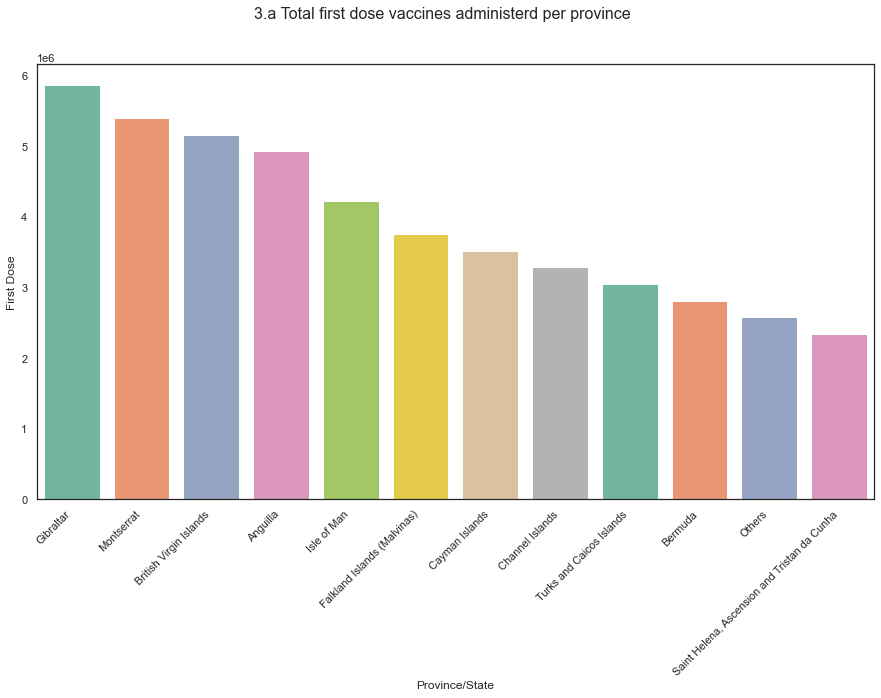

In [71]:
plt.figure(figsize=(15,8))
sns.set(style='white')

# Order the plot by province total
plot_order = vax_ratios.groupby('Province/State')['First Dose'].sum().sort_values(ascending=False).index.values

#create stacked bar chart
sns.barplot(x='Province/State', y='First Dose', data=vax_ratios,order=plot_order, palette='Set2')

# Plot asthetics
plt.suptitle("3.a Total first dose vaccines administerd per province", fontsize=16)
var = plt.xticks(rotation=45,ha="right")

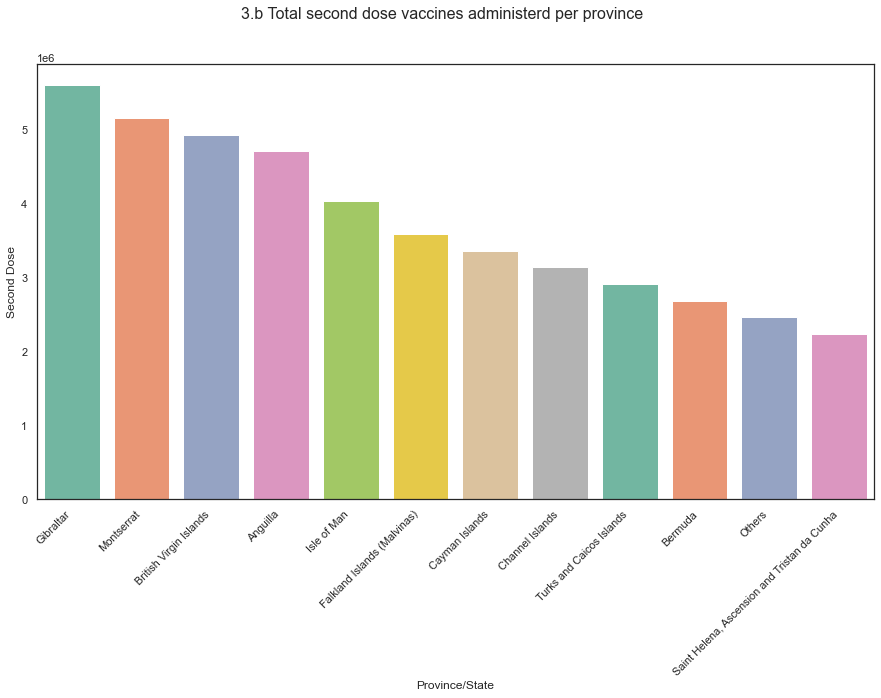

In [72]:
plt.figure(figsize=(15,8))
sns.set(style='white')

# Order the plot by province total
plot_order = vax_ratios.groupby('Province/State')['Second Dose'].sum().sort_values(ascending=False).index.values

#create stacked bar chart
sns.barplot(x='Province/State', y='Second Dose', data=vax_ratios,order=plot_order, palette='Set2')

# Plot asthetics
plt.suptitle("3.b Total second dose vaccines administerd per province", fontsize=16)
var = plt.xticks(rotation=45,ha="right")

In [284]:
# Descriptive analysis of the totals ands percentage vaccination values for provinces

vax_ratios.describe()


,First Dose,Second Dose,Two Doses,One Dose
count,1.200000e+01,1.200000e+01,12.000000,12.000000
mean,3.913864e+06,3.737362e+06,95.490375,4.509625
std,1.186194e+06,1.132699e+06,0.000282,0.000282
min,2.348310e+06,2.242421e+06,95.489878,4.509158
25%,2.994112e+06,2.859079e+06,95.490235,4.509490
50%,3.639892e+06,3.475746e+06,95.490392,4.509608
75%,4.990178e+06,4.765133e+06,95.490510,4.509765
max,5.870786e+06,5.606041e+06,95.490842,4.510122


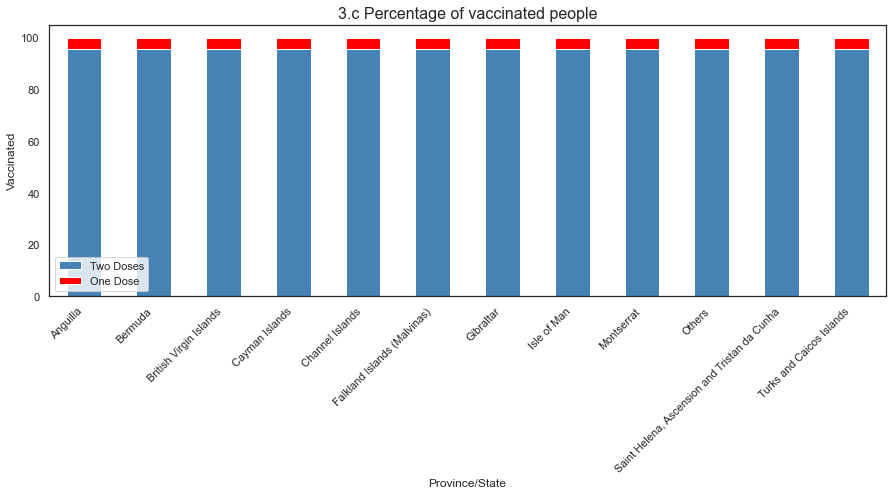

In [74]:
# Stacked barplot of the percentage difference in one dose and two dose vaccinations

sns.set(rc={'figure.figsize':(15,5)})
sns.set(style='white')

# Create a df to plot percentage totals of vaccination difference
df = vax_ratios.loc[:,['Province/State','Two Doses','One Dose']]

#create stacked bar chart
df.set_index('Province/State').plot(kind='bar', stacked=True, color=['steelblue', 'red'])

#add overall title
plt.title('3.c Percentage of vaccinated people', fontsize=16)

#add axis titles
plt.xlabel('Province/State')
plt.ylabel('Vaccinated')

#rotate x-axis labels
var = plt.xticks(rotation=45,ha="right")

#### Observations:

The province totals are widely dispersed however the standard deviation for the percentage difference between One dose and Two doses is 0.000282(%) implying that there is insignificantly low dispersion and that the data is almost identical. Considering that the actual total values are high such low dispersion in the percentages seems unlikely in a real-life scenario.

The following cells will:

a) Resample total first dose, second dose vaccinations to monthly values and plot over time
   
b) Reseample percentage change in one dose and two dose vacinations to monthly values and plot over time


<br>                                                                                </br>

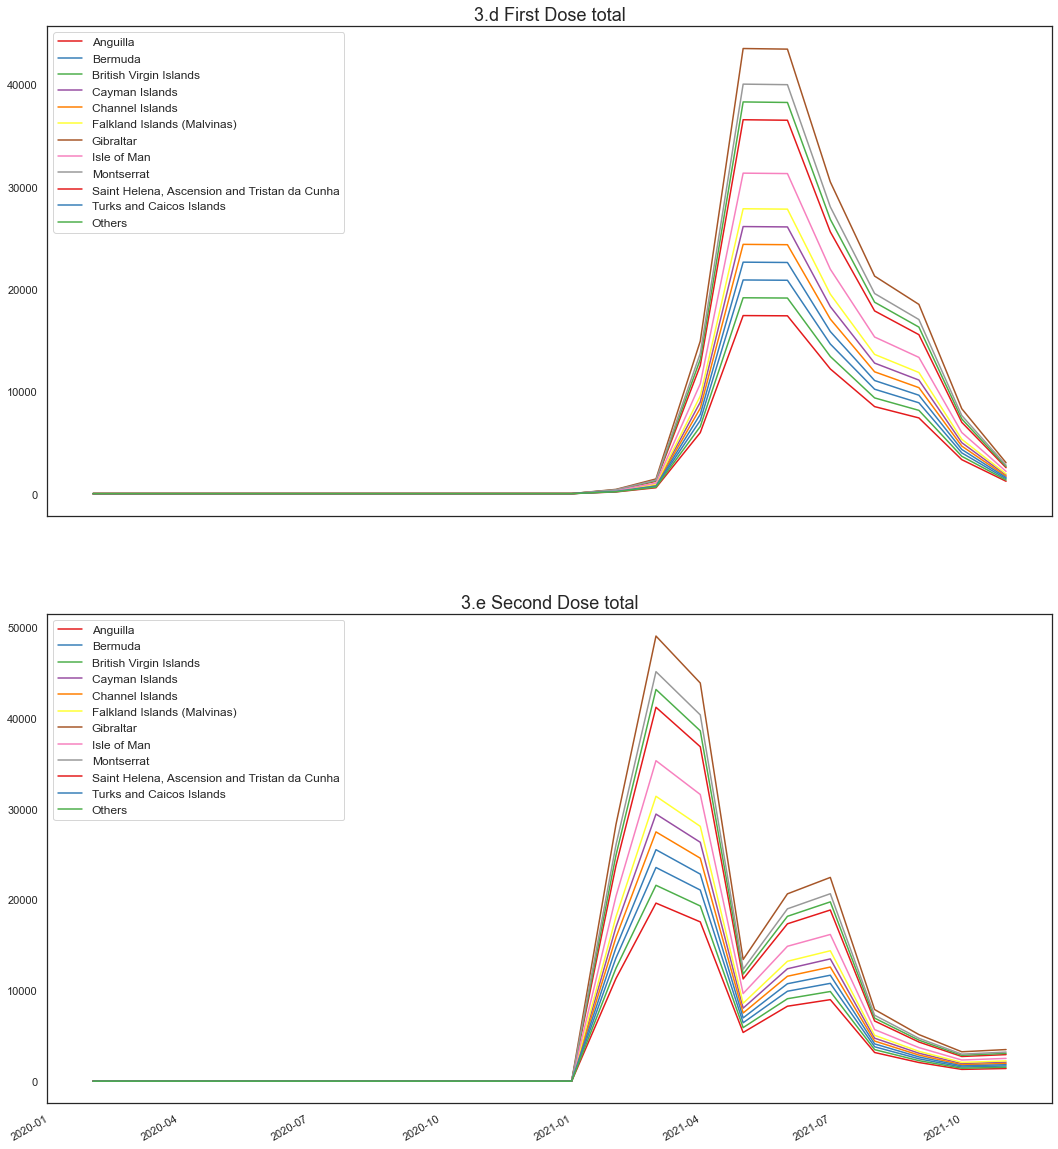

In [85]:
fig, (ax1, ax2) = plt.subplots(2,figsize=(18,22))
plt.rcParams["image.cmap"] = "Dark2"

# Loop the get the provinces names and resample to Month to visualise Monthly values
for Province in final_table['Province/State'].unique():
    temp_df = final_table[(final_table['Province/State'] == Province)]
    df_smooth = temp_df.resample('M').mean()

# Plot totals
    ax2.plot('First Dose', data=df_smooth, label=Province)
    ax1.plot('Second Dose', data=df_smooth, label=Province)

# Plot asthetics
ax2.legend(loc='upper left', prop={'size': 12})
ax1.legend(loc='upper left', prop={'size': 12})
ax2.set_title("3.e Second Dose total", fontsize=18)
ax1.set_title("3.d First Dose total", fontsize=18)
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set1.colors)
fig.autofmt_xdate()

#### Observation

We can observe in the two plots above, apart from differences in totals, there is no observable difference in trend or pattern.

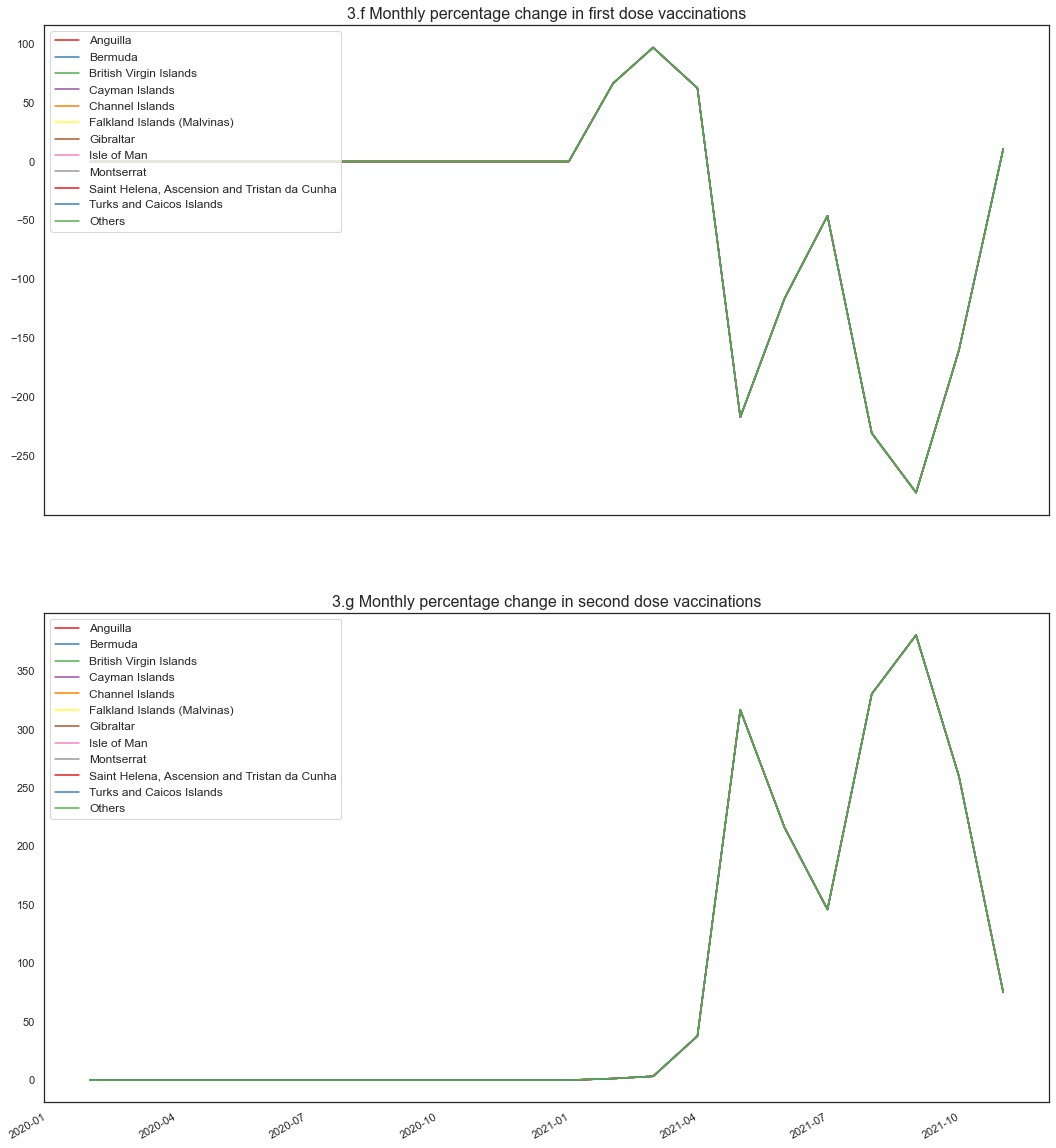

In [86]:
fig, (ax1, ax2) = plt.subplots(2,figsize=(18,22))
plt.rcParams["image.cmap"] = "Dark2"

# Loop the get the provinces names and resample to Month to visualise Monthly values
for Province in final_table['Province/State'].unique():
    temp_df = final_table[(final_table['Province/State'] == Province)]
    df_smooth = temp_df.resample('M').mean()

# Plot totals
    ax2.plot('Two Doses', data=df_smooth, label=Province)
    ax1.plot('One Dose', data=df_smooth, label=Province)

# Plot asthetics
ax2.legend(loc='upper left', prop={'size': 12})
ax1.legend(loc='upper left', prop={'size': 12})
ax2.set_title("3.g Monthly percentage change in second dose vaccinations", fontsize=16)
ax1.set_title("3.f Monthly percentage change in first dose vaccinations", fontsize=16)
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set1.colors)
fig.autofmt_xdate()

#### Observation

The two visualisations above plot the monthly percentage change in One dose and Two dose vaccinations for all of the provinces on the same plot. 

For One dose vaccinations we can see from the first plot that there are negative values as a result of people taking the second dose. When compared with the second plot on Two doses we can see that as it peaks the first dose declines.

As discovered earlier due to almost zero deviation, and thus very little dispersion in the data, when the changes in percentages are plotted on the same plot for all the provinces its so close that the lines are tranposed on top of eachother.

Based on the analysis above we can conclude that the data on vanccinations does not provide insights that allows us to make recommendations as to which province should be targeted for first for awerness campgains. The reason for this is that due to similarity in the relative differences we can not make a case for one province over another.

